In [74]:
# this workbook is for testing the neural network on a year's data and predicting data for a week

In [91]:
# Libraries

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [92]:
# Reading csv file to dataframe
df = pd.read_csv('data.csv')
df.head()

,year,month,day,hour,zone,longitude,latitude,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,temperature,dewpt,condition
0,2021,1,1,0,2,74.27,31.39,5,4058.84,30.40,42.16,0.00,9.78,395.20,484.22,26.35,6.9,4.6,Haze
1,2021,1,1,1,2,74.27,31.39,5,5447.39,63.48,44.55,0.00,12.16,488.46,585.86,27.11,5.8,4.6,Haze
2,2021,1,1,2,2,74.27,31.39,5,8117.68,135.90,48.67,0.00,16.69,658.20,779.81,33.44,3.7,4.4,Fog
3,2021,1,1,3,2,74.27,31.39,5,11856.08,243.19,59.63,0.05,21.46,863.67,1015.06,39.52,3.6,4.8,Fog
4,2021,1,1,4,2,74.27,31.39,5,12603.76,250.34,83.63,1.23,24.80,883.55,1027.48,41.54,4.9,4.9,Haze


In [93]:
# transforming labels of data
le = preprocessing.LabelEncoder()
le.fit(df.condition)
df['condition_label'] = le.transform(df.condition)

In [94]:
# converting date time to pandas datetime
date_time=pd.to_datetime(df[['year','month','day','hour']])

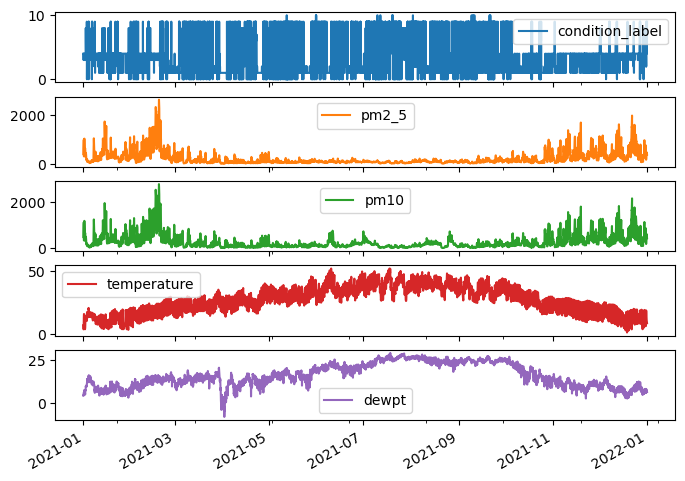

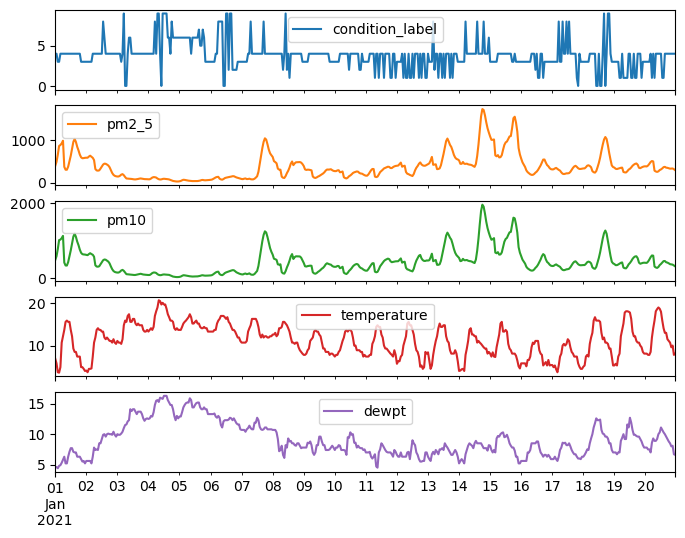

In [95]:
plot_cols = ['condition_label','pm2_5','pm10','temperature','dewpt']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [99]:
# viewing statistics of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,8735.0,2021.000000,0.000000e+00,2021.00,2021.000,2021.00,2021.00,2021.00
month,8735.0,6.540584,3.440278e+00,1.00,4.000,7.00,10.00,12.00
day,8735.0,15.687693,8.787729e+00,1.00,8.000,16.00,23.00,31.00
hour,8735.0,11.498798,6.922067e+00,0.00,5.500,11.00,17.00,23.00
zone,8735.0,2.000000,0.000000e+00,2.00,2.000,2.00,2.00,2.00
longitude,8735.0,74.270000,0.000000e+00,74.27,74.270,74.27,74.27,74.27
latitude,8735.0,31.390000,1.065875e-14,31.39,31.390,31.39,31.39,31.39
aqi,8735.0,5.000000,0.000000e+00,5.00,5.000,5.00,5.00,5.00
co,8735.0,3046.928595,3.613265e+03,243.66,834.470,1628.88,3738.40,25848.39
no,8735.0,30.980474,6.508701e+01,0.00,0.200,1.58,26.82,500.68


In [98]:
df.drop(['year','month','day','hour'],axis=1)

,zone,longitude,latitude,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,temperature,dewpt,condition,condition_label
0,2,74.27,31.39,5,4058.84,30.40,42.16,0.00,9.78,395.20,484.22,26.35,6.9,4.6,Haze,4
1,2,74.27,31.39,5,5447.39,63.48,44.55,0.00,12.16,488.46,585.86,27.11,5.8,4.6,Haze,4
2,2,74.27,31.39,5,8117.68,135.90,48.67,0.00,16.69,658.20,779.81,33.44,3.7,4.4,Fog,3
3,2,74.27,31.39,5,11856.08,243.19,59.63,0.05,21.46,863.67,1015.06,39.52,3.6,4.8,Fog,3
4,2,74.27,31.39,5,12603.76,250.34,83.63,1.23,24.80,883.55,1027.48,41.54,4.9,4.9,Haze,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,2,74.27,31.39,5,5126.95,54.09,70.60,0.00,17.40,468.69,611.31,49.14,10.7,7.4,Haze,4
8731,2,74.27,31.39,5,4699.71,45.60,62.38,0.00,12.76,454.02,578.06,37.49,10.0,7.4,Haze,4
8732,2,74.27,31.39,5,4005.43,32.19,53.47,0.00,7.99,422.81,520.86,25.59,9.6,7.0,Haze,4
8733,2,74.27,31.39,5,3631.59,22.13,48.67,0.01,5.42,402.86,480.65,19.00,10.0,7.1,Haze,4
